In [9]:
import pandas as pd
data = pd.read_csv('student_scores.csv')
print(data.head())
print(data.isnull().sum())
invalid_marks = data.drop(columns='Student').map(lambda x: x < 0 or x > 100)
print("Invalid Marks:\n", data[invalid_marks.any(axis=1)])

   Student  Maths  Science  English  SST
0     Amit     78       85       67   64
1     Riya     56       59       61   65
2    Sohan     90       91       89   93
3     Neha     45       52       50   49
4   Rahul      66       72       70   68
Student    0
Maths      0
Science    0
English    0
SST        0
dtype: int64
Invalid Marks:
 Empty DataFrame
Columns: [Student, Maths, Science, English, SST]
Index: []


In [10]:
import numpy as np
from scipy import stats

subjects = ['Maths', 'Science', 'English', 'SST']


mean_scores = data[subjects].mean()
median_scores = data[subjects].median()
mode_scores = data[subjects].mode().iloc[0]

std_dev = data[subjects].std()
variance = data[subjects].var()


subject_avg = data[subjects].mean()
most_scoring_subject = subject_avg.idxmax()
least_scoring_subject = subject_avg.idxmin()


print("Mean:\n", mean_scores)
print("Median:\n", median_scores)
print("Mode:\n", mode_scores)
print("Standard Deviation:\n", std_dev)
print("Variance:\n", variance)
print(f"Most Scoring Subject: {most_scoring_subject}")
print(f"Least Scoring Subject: {least_scoring_subject}")

Mean:
 Maths      67.0
Science    70.0
English    69.0
SST        68.0
dtype: float64
Median:
 Maths      66.0
Science    68.5
English    67.0
SST        65.5
dtype: float64
Mode:
 Maths      45.0
Science    48.0
English    67.0
SST        47.0
Name: 0, dtype: float64
Standard Deviation:
 Maths      16.706619
Science    15.448840
English    13.976170
SST        15.055453
dtype: float64
Variance:
 Maths      279.111111
Science    238.666667
English    195.333333
SST        226.666667
dtype: float64
Most Scoring Subject: Science
Least Scoring Subject: Maths


In [11]:

data['Total'] = data[subjects].sum(axis=1)
data['Average'] = data['Total'] / len(subjects)


def performance_category(avg):
    if avg >= 85:
        return 'Excellent'
    elif avg >= 70:
        return 'Good'
    elif avg >= 50:
        return 'Average'
    else:
        return 'Needs Improvement'

data['Category'] = data['Average'].apply(performance_category)

print(data[['Student', 'Total', 'Average', 'Category']])


   Student  Total  Average           Category
0     Amit    294    73.50               Good
1     Riya    241    60.25            Average
2    Sohan    363    90.75          Excellent
3     Neha    196    49.00  Needs Improvement
4   Rahul     276    69.00            Average
5   Anjali    243    60.75            Average
6     Ravi    359    89.75          Excellent
7    Priya    264    66.00            Average
8    Rohan    313    78.25               Good
9    Meena    191    47.75  Needs Improvement


In [6]:
top_scorers = {}

for subject in subjects:
    max_score = data[subject].max()
    topper = data[data[subject] == max_score]['Student'].values
    top_scorers[subject] = list(topper)

print("Subject-Wise Toppers:")
for subject, toppers in top_scorers.items():
    print(f"{subject}: {', '.join(toppers)}")

Subject-Wise Toppers:
Maths: Sohan, Ravi
Science: Sohan
English: Ravi
SST: Sohan


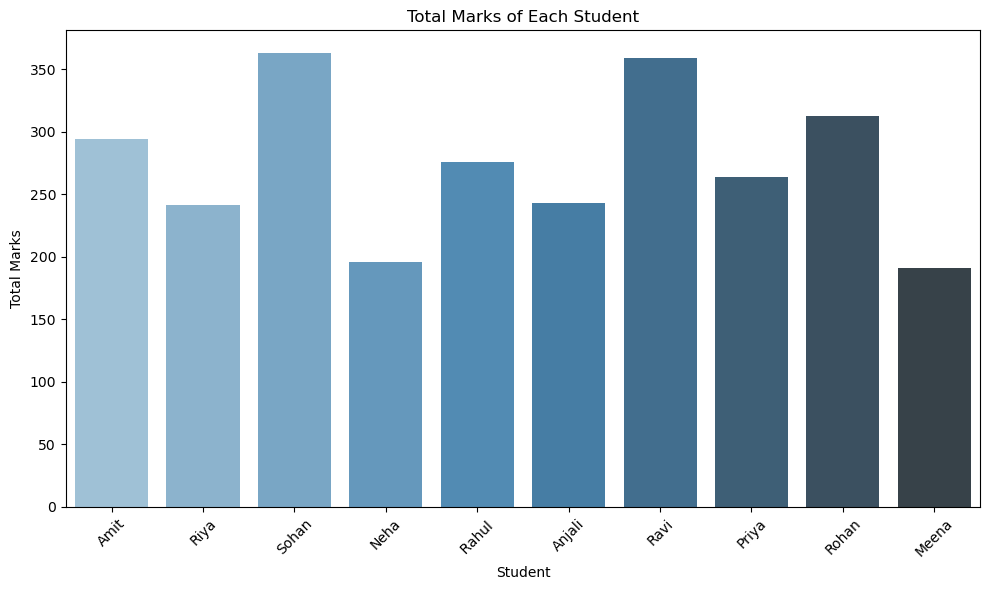

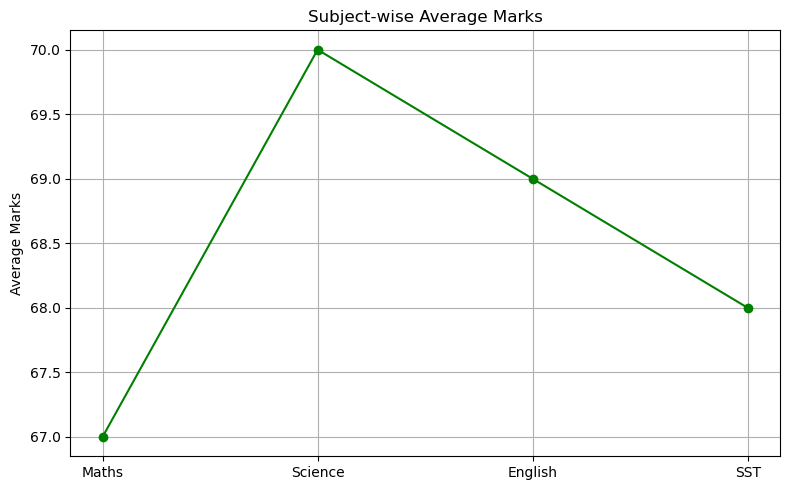

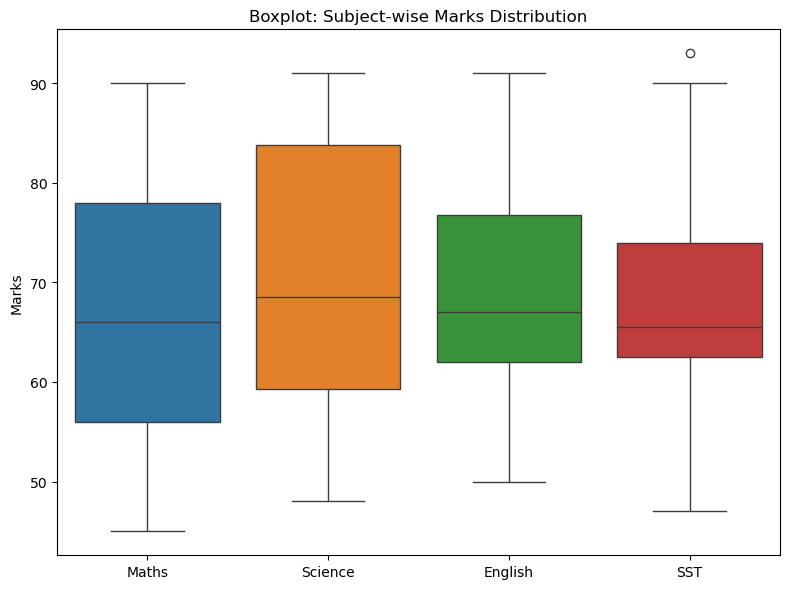

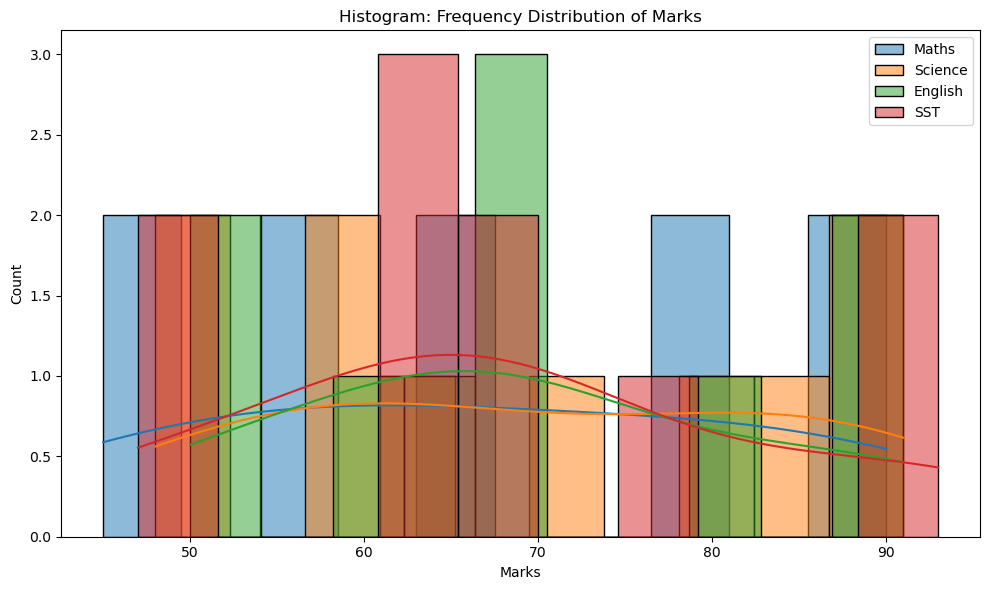

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(x='Student', y='Total', data=data, hue='Student', palette='Blues_d', legend=False)
plt.title('Total Marks of Each Student')
plt.ylabel('Total Marks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line Chart
plt.figure(figsize=(8,5))
plt.plot(subjects, subject_avg.values, marker='o', color='green')
plt.title('Subject-wise Average Marks')
plt.ylabel('Average Marks')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=data[subjects])
plt.title('Boxplot: Subject-wise Marks Distribution')
plt.ylabel('Marks')
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(10,6))
for subject in subjects:
    sns.histplot(data[subject], kde=True, bins=10, label=subject)
plt.title('Histogram: Frequency Distribution of Marks')
plt.xlabel('Marks')
plt.legend()
plt.tight_layout()
plt.show()